# Model Building

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm
import seaborn as sns

In [2]:
df = pd.read_csv('./Resources/data_cleanned.csv')

In [3]:
# Check the columns to define relevant variables
df.columns

Index(['Category', 'Type', 'Zipcode', 'City', 'Neighboor', 'Description',
       'c_Elevador', 'c_Portaria', 'c_Piscina', 'c_Portao_eletronico',
       'c_Condominio_fechado', 'c_Segurança_24h', 'c_Permitido_animais',
       'c_Area_murada', 'c_Academia', 'c_Salao_de_festas', 'p_Porteiro_24h',
       'p_Churrasqueira', 'p_Piscina', 'p_Armarios_embutidos',
       'p_Ar_condicionado', 'p_Quarto_de_servico', 'p_Varanda',
       'p_Armarios_na_cozinha', 'p_Academia', 'p_Area_de_servico',
       'p_Mobiliado', 'p_Salao_de_festas', 'Price_Value', 'Area_value',
       'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty'],
      dtype='object')

In [4]:
df_model = df[['Type', 'City', 'Neighboor',
       'c_Elevador', 'c_Portaria', 'c_Piscina',
       'c_Portao_eletronico', 'c_Condominio_fechado', 'c_Segurança_24h',
       'c_Permitido_animais', 'c_Area_murada', 'c_Academia',
       'c_Salao_de_festas', 'p_Porteiro_24h', 'p_Churrasqueira', 'p_Piscina',
       'p_Armarios_embutidos', 'p_Ar_condicionado', 'p_Quarto_de_servico',
       'p_Varanda', 'p_Armarios_na_cozinha', 'p_Academia', 'p_Area_de_servico',
       'p_Mobiliado', 'p_Salao_de_festas', 'Price_Value', 'Area_value',
       'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty']]


In [5]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [6]:
columns_check = ['Price_Value', 'Area_value',
       'Bedrooms_qty', 'Bathrooms_qty', 'Garage_qty']

In [7]:
def plot_hist_dist(columns, df):
    for item in columns:
        mu, std = norm.fit(df[item])
        plt.hist(df[item], density=True, alpha=0.6)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = item + " Skew: {:.2f} and Kurtosis: {:.2f}".format(df[item].skew()
                                                                   ,df[item].kurtosis())
        plt.title(title) 
        plt.show()

In [8]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Columns: 238 entries, c_Elevador to Neighboor_Álvaro Weyne
dtypes: int64(27), uint8(211)
memory usage: 3.3 MB


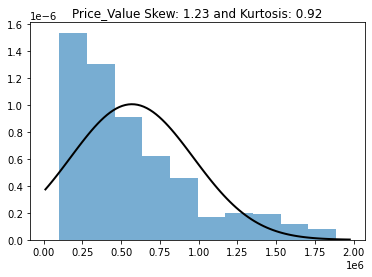

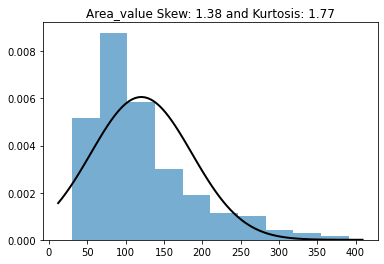

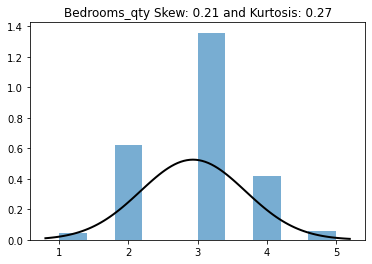

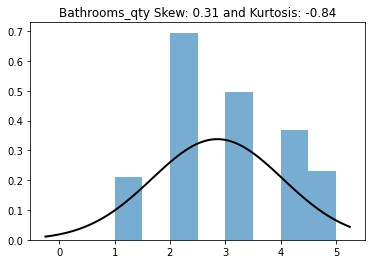

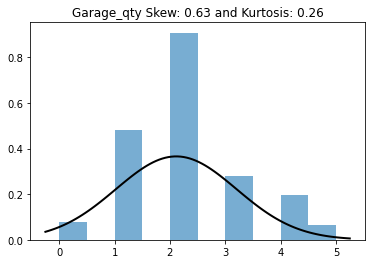

In [9]:
plot_hist_dist(columns_check,df_dum)

In [10]:
df_dum['Price_Value'] = np.log(df_dum['Price_Value'])
df_dum['Area_value'] = np.log(df_dum['Area_value'])

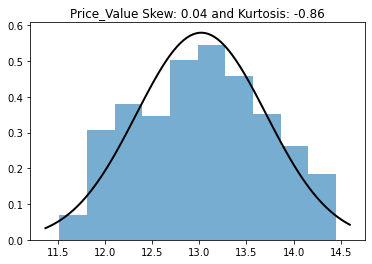

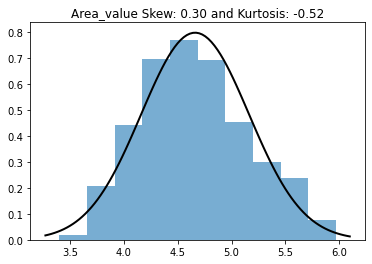

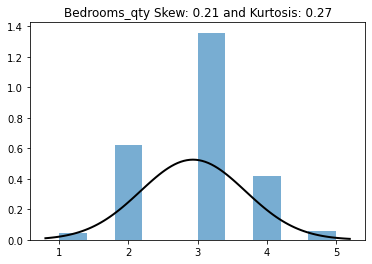

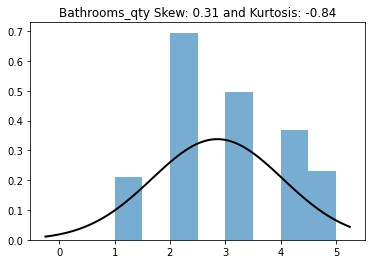

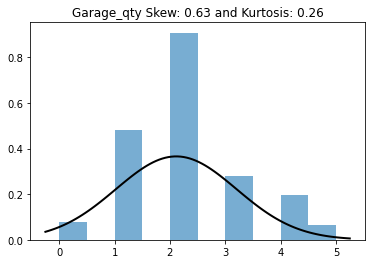

In [11]:
plot_hist_dist(columns_check,df_dum)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_dum.drop('Price_Value', axis =1)
y = df_dum.Price_Value.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# multiple linear regression 
import statsmodels.api as sm

In [16]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

C:\Users\henrique.innecco\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:53:08   Log-Likelihood:                -1963.7
No. Observations:                8226   AIC:                             4393.
Df Residuals:                    7993   BIC:                             6028.
Df Model:                         232                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       7.5014      0.055    135.488      0.000       7.393       7.610
c_Elevador                                  0.0452      0.011      3.992      0.000       0.023       0.067
c_Portaria                                  0.0029      0.015      0.193      0.847      -0.027       0.032
c_Piscina                                   0.1239      0.032      3.844      0.000       0.061       0.187
c_Portao_eletronico                        -0.0048      0.020     -0.244      0.807      -0.043       0.034
c_Condominio_fechado                       -0.0809      0.011     -7.268      0.000      -0.103      -0.059
c_Segurança_24h                            -0.0248      0.018     -1.371      0.170      -0.060       0.011
c_Permitido_animais                        -0.0622      0.011     -5.829      0.000      -0.083      -0.041
c_Area_murada                               0.0919      0.037      2.477      0.013       0.019       0.165
c_Academia                                  0.1855      0.019      9.940      0.000       0.149       0.222
c_Salao_de_festas                          -0.0571      0.014     -4.147      0.000      -0.084      -0.030
p_Porteiro_24h                              0.0077      0.024      0.322      0.748      -0.039       0.055
p_Churrasqueira                             0.0393      0.010      3.961      0.000       0.020       0.059
p_Piscina                                   0.0402      0.032      1.238      0.216      -0.023       0.104
p_Armarios_embutidos                        0.0252      0.024      1.042      0.298      -0.022       0.072
p_Ar_condicionado                           0.0300      0.010      2.986      0.003       0.010       0.050
p_Quarto_de_servico                        -0.0460      0.025     -1.839      0.066      -0.095       0.003
p_Varanda                                   0.0691      0.009      7.390      0.000       0.051       0.087
p_Armarios_na_cozinha                      -0.0490      0.021     -2.363      0.018      -0.090      -0.008
p_Academia                                  0.0921      0.023      4.055      0.000       0.048       0.137
p_Area_de_servico                          -0.0509      0.008     -6.156      0.000      -0.067      -0.035
p_Mobiliado                                 0.0270      0.012      2.223      0.026       0.003       0.051
p_Salao_de_festas                          -0.0276      0.054     -0.507      0.612      -0.134       0.079
Area_value                                  0.5555      0.014     38.686      0.000       0.527       0.584
Bedrooms_qty                                0.0486      0.007      6.614      0.000       0.034       0.063
Bathrooms_qty                               0.0976      0.0

In [17]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-98346022.69367404

In [19]:
# lasso regression 
lm_l = Lasso(alpha=.001)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.24890824289192107

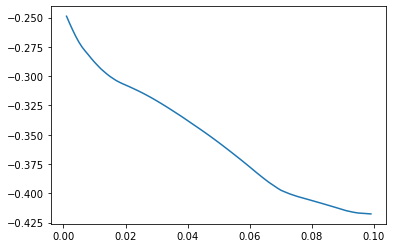

In [20]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [21]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
0,0.001,-0.248908


In [22]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-0.20073296562723586

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# tune models GridsearchCV 

parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [25]:
gs.best_score_

-0.19817817527860146

In [26]:
gs.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 260}

In [27]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=260)

In [28]:
# test ensembles 
tpred_lm = lm.predict(X_test)

In [29]:
tpred_lml = lm_l.predict(X_test)

In [30]:
tpred_rf = gs.best_estimator_.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(y_test,tpred_lm)

13061718.310281547

In [33]:
mean_absolute_error(y_test,tpred_lml)

0.24672210067306688

In [34]:
mean_absolute_error(y_test,tpred_rf)

0.18555958790646632

In [35]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

6530859.233233615

In [36]:

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( './Resources/model_file.p', "wb" ) )

In [37]:
file_name = "./Resources/model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [38]:
for i in range(len(y_test)):
    price = np.exp(model.predict(np.array(list(X_test.iloc[i,:])).reshape(1,-1))[0])
    print(f'Predicted Value: R$ {price:.2f}')
    price = np.exp(y_test[i])
    print(f'Real Value: R$ {price:.2f}')

Predicted Value: R$ 742466.55
Real Value: R$ 900000.00
Predicted Value: R$ 150389.85
Real Value: R$ 158490.00
Predicted Value: R$ 743826.41
Real Value: R$ 826000.00
Predicted Value: R$ 152669.87
Real Value: R$ 135000.00
Predicted Value: R$ 1392647.66
Real Value: R$ 980000.00
Predicted Value: R$ 184065.26
Real Value: R$ 180000.00
Predicted Value: R$ 573772.67
Real Value: R$ 585000.00
Predicted Value: R$ 334170.57
Real Value: R$ 330000.00
Predicted Value: R$ 744130.90
Real Value: R$ 740000.00
Predicted Value: R$ 366205.00
Real Value: R$ 900000.00
Predicted Value: R$ 454806.41
Real Value: R$ 540000.00
Predicted Value: R$ 1387623.03
Real Value: R$ 1500000.00
Predicted Value: R$ 193910.10
Real Value: R$ 199000.00
Predicted Value: R$ 584545.63
Real Value: R$ 470000.00
Predicted Value: R$ 857285.68
Real Value: R$ 665000.00
Predicted Value: R$ 679603.47
Real Value: R$ 719000.00
Predicted Value: R$ 138634.51
Real Value: R$ 150000.00
Predicted Value: R$ 867062.75
Real Value: R$ 899990.00
Predict

In [49]:
X.iloc[:,23] = np.exp(X.iloc[:,23])

In [50]:
list(X.iloc[1,:])

[1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 54.00000000000001,
 2.0,
 2.0,
 2.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0